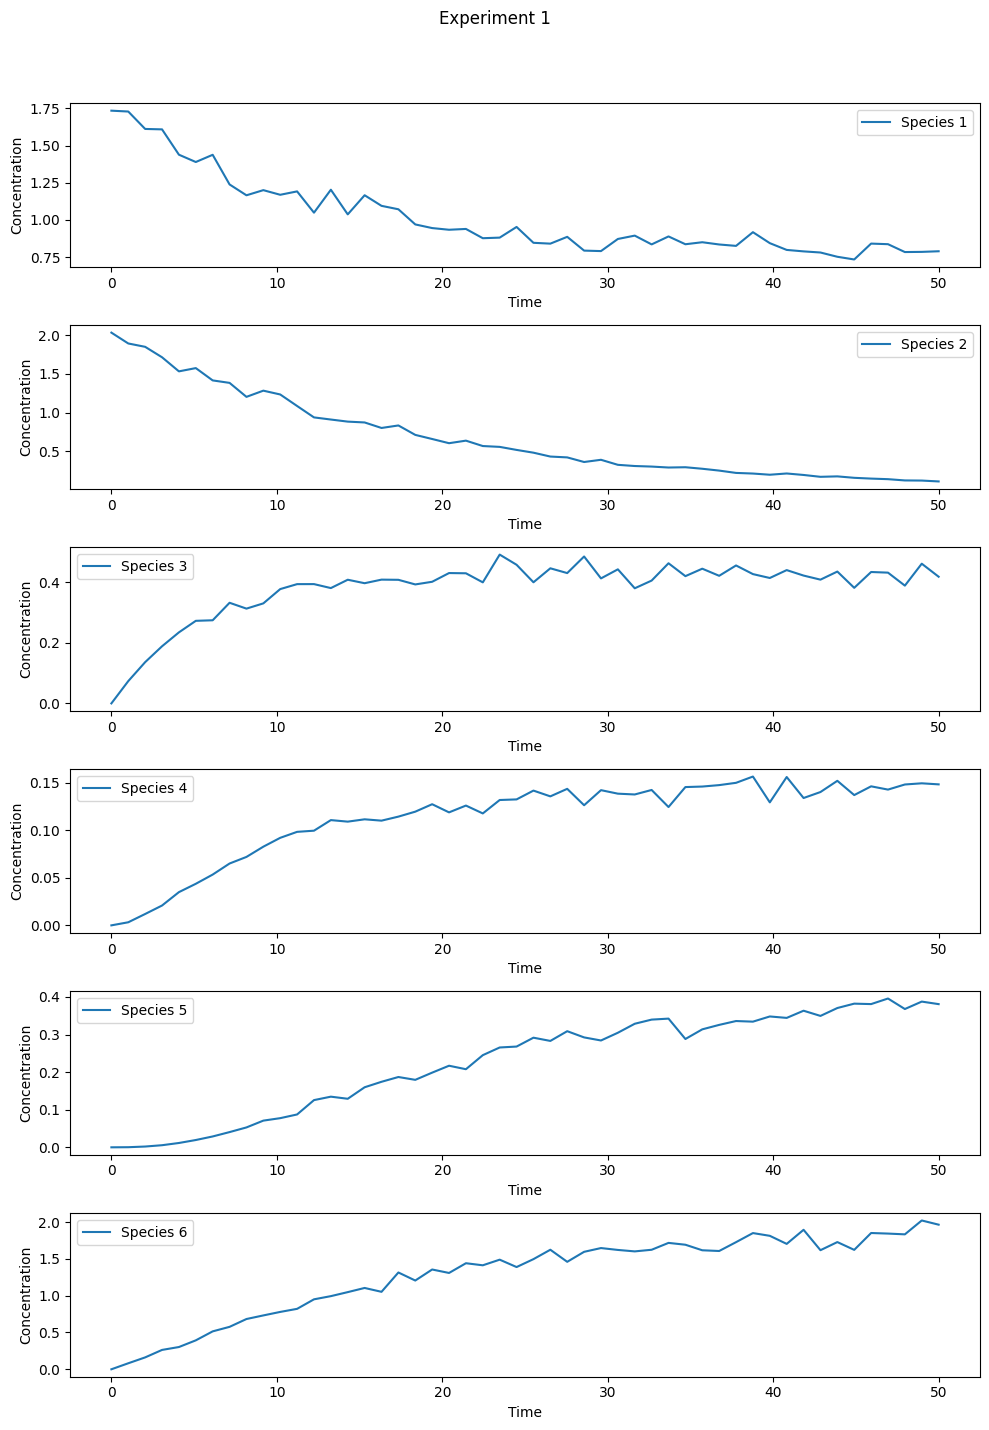

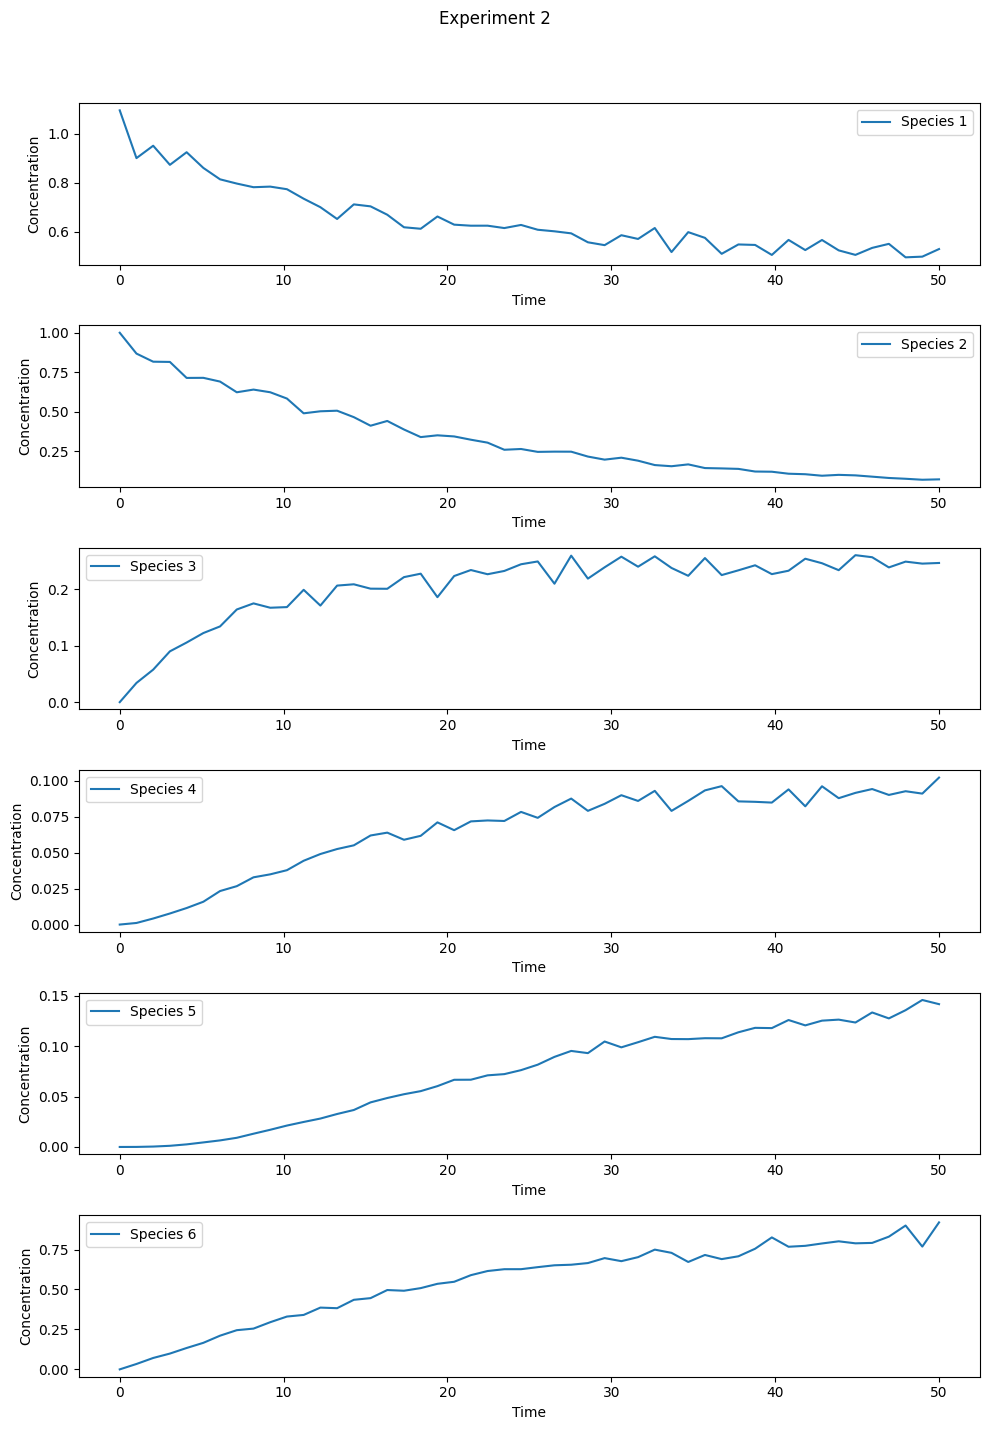

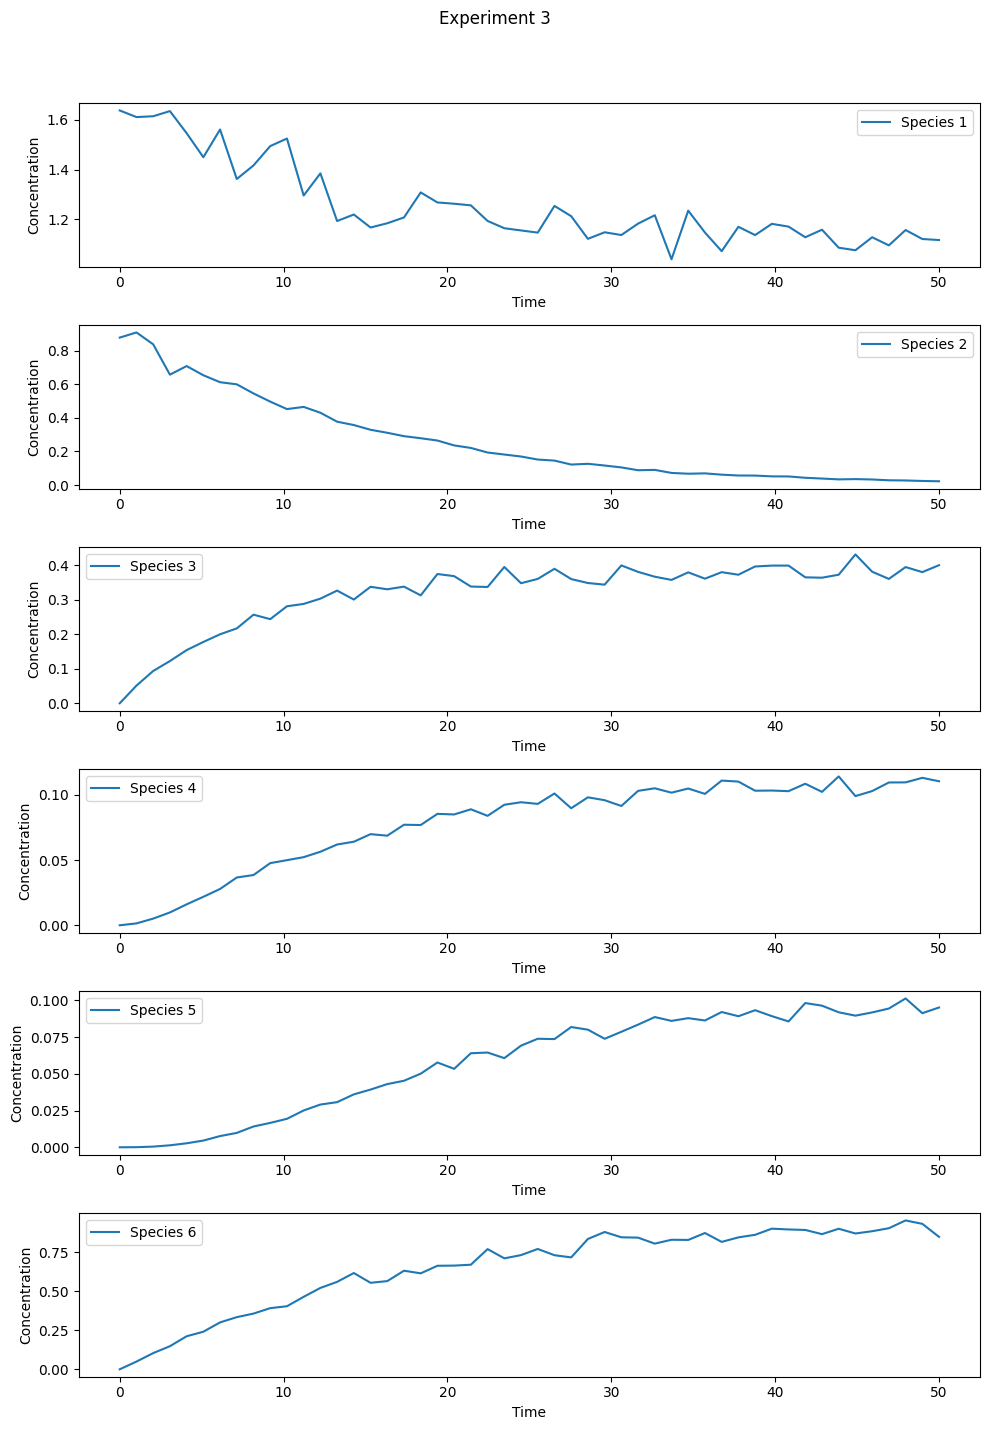

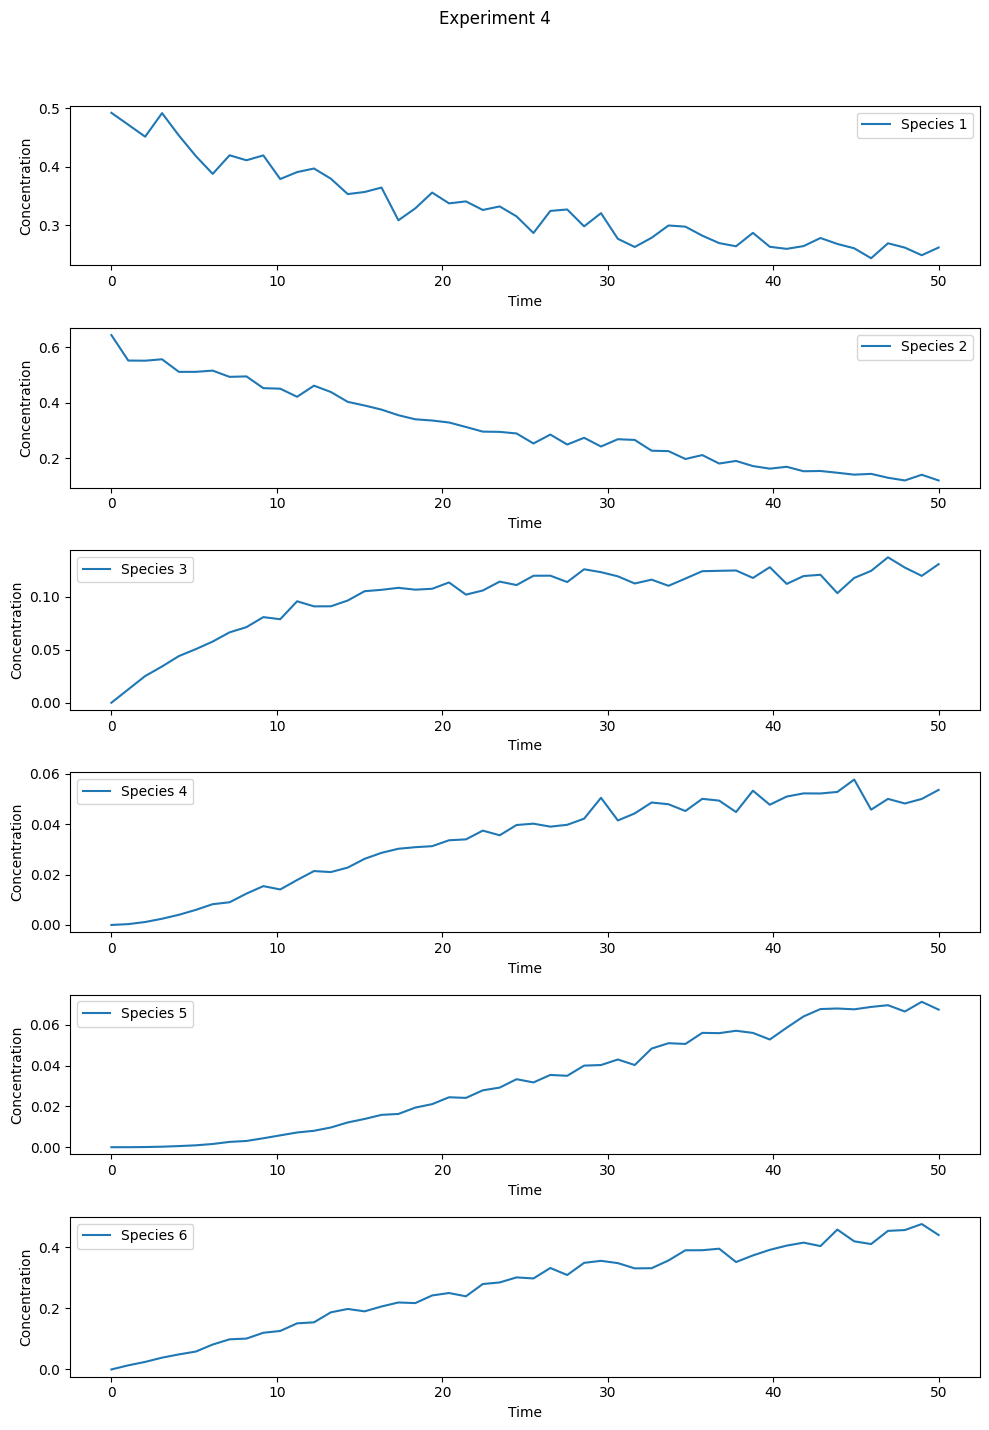

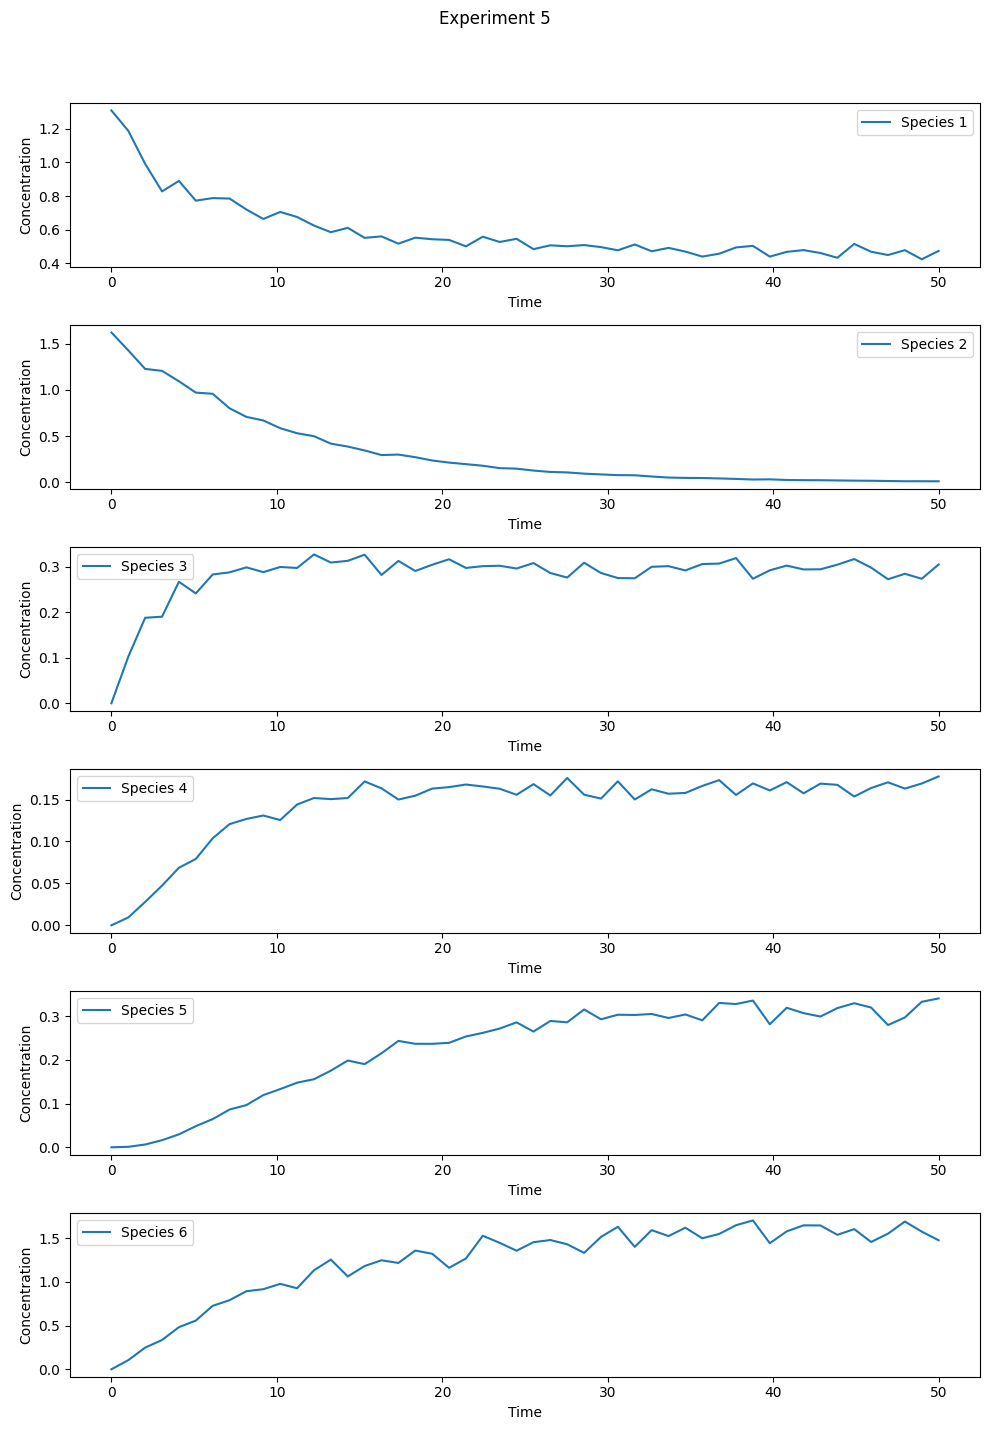

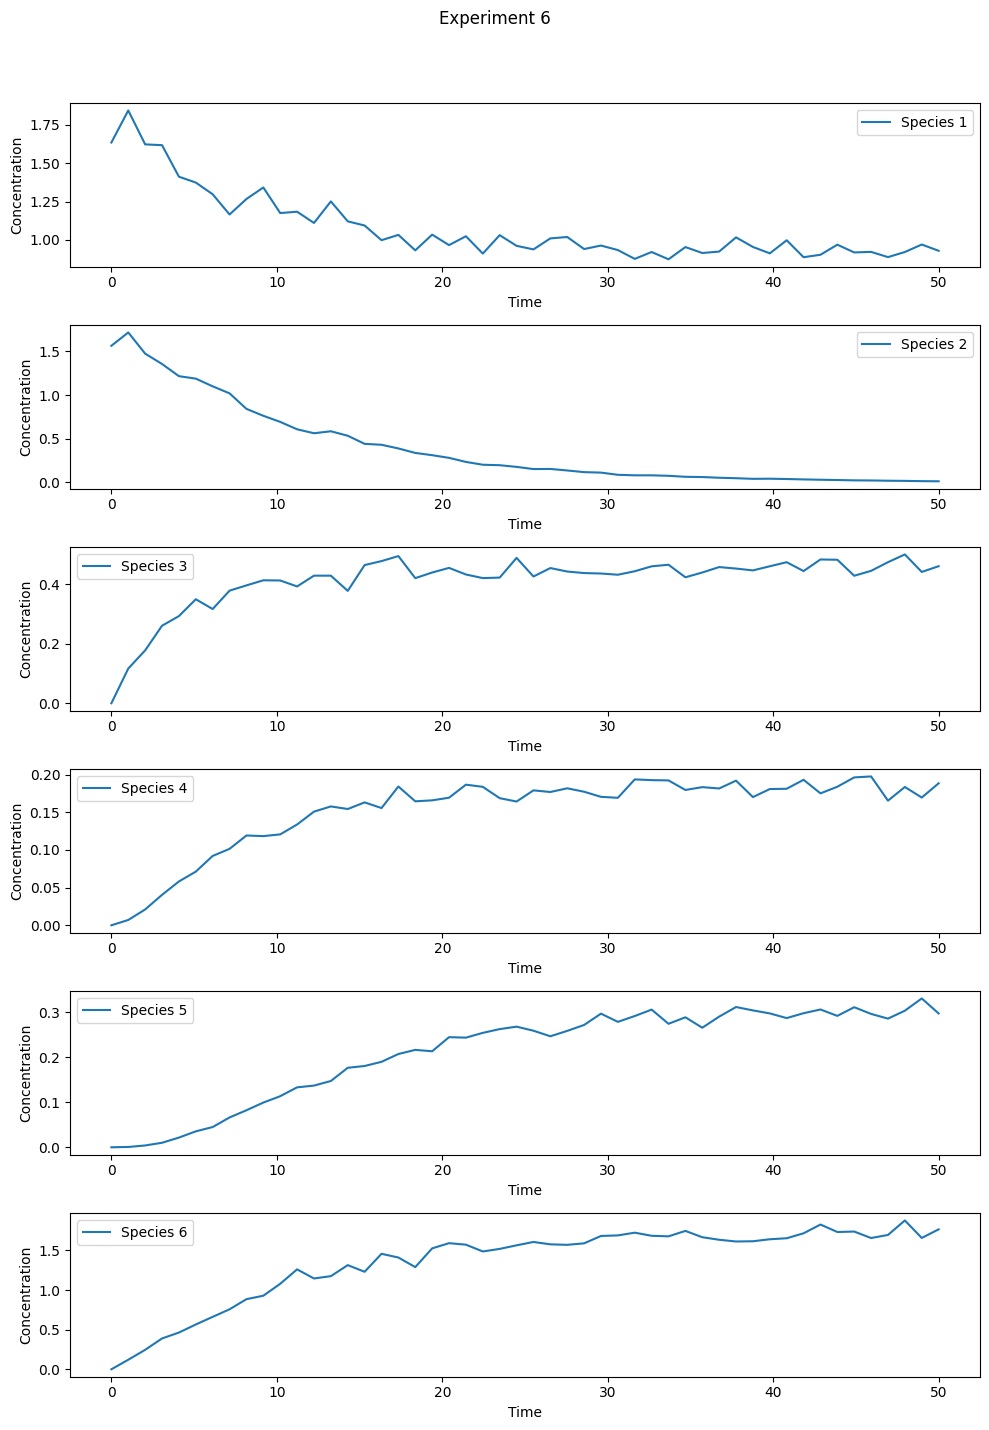

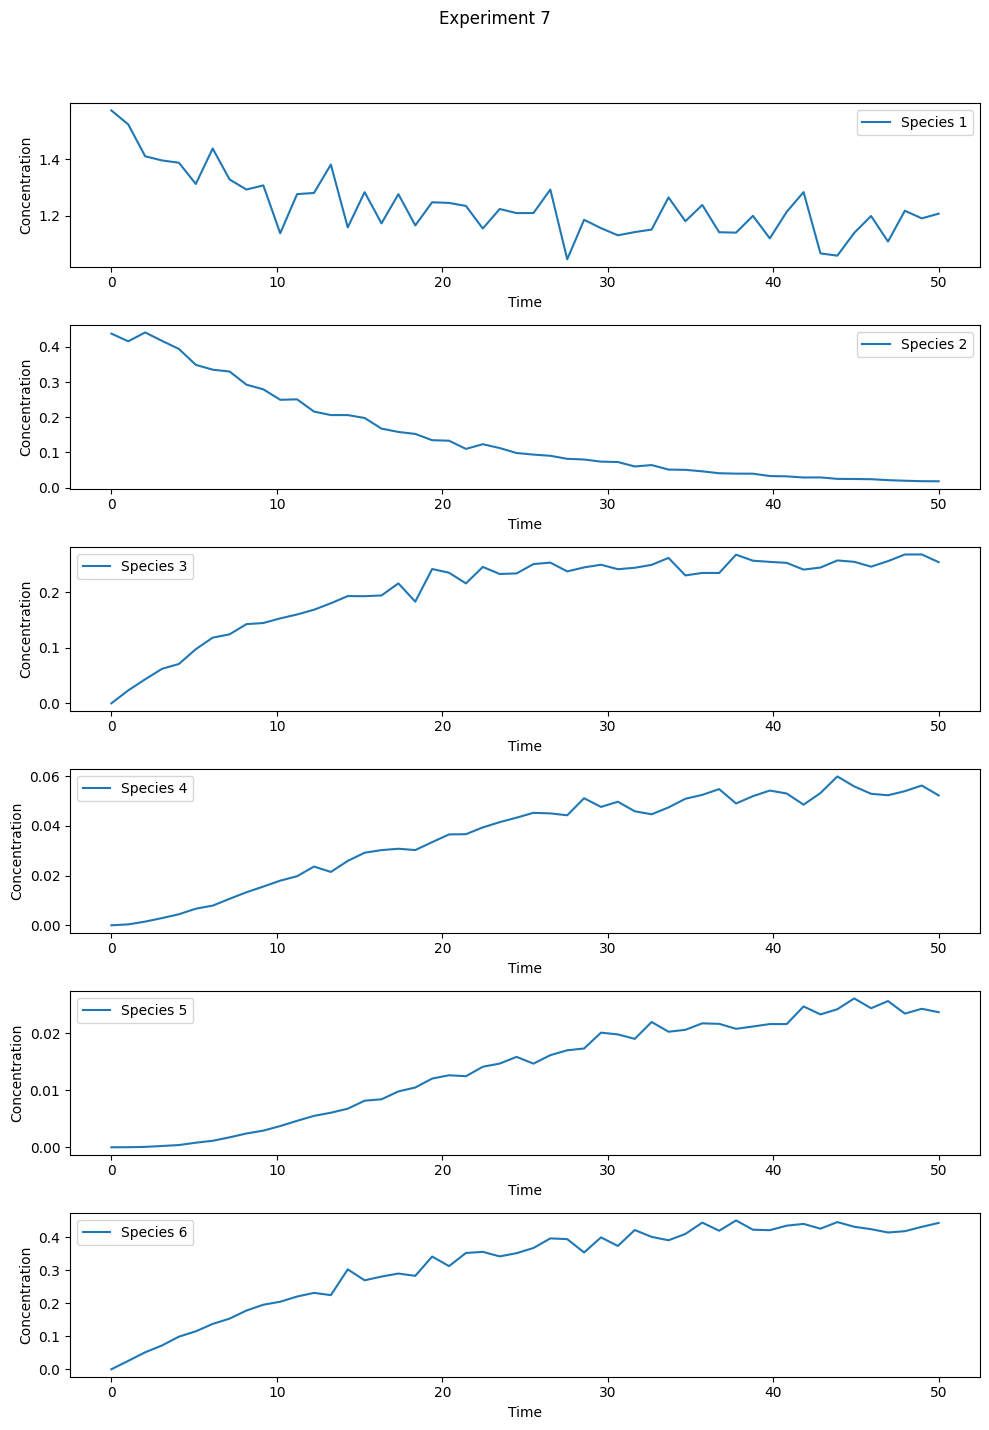

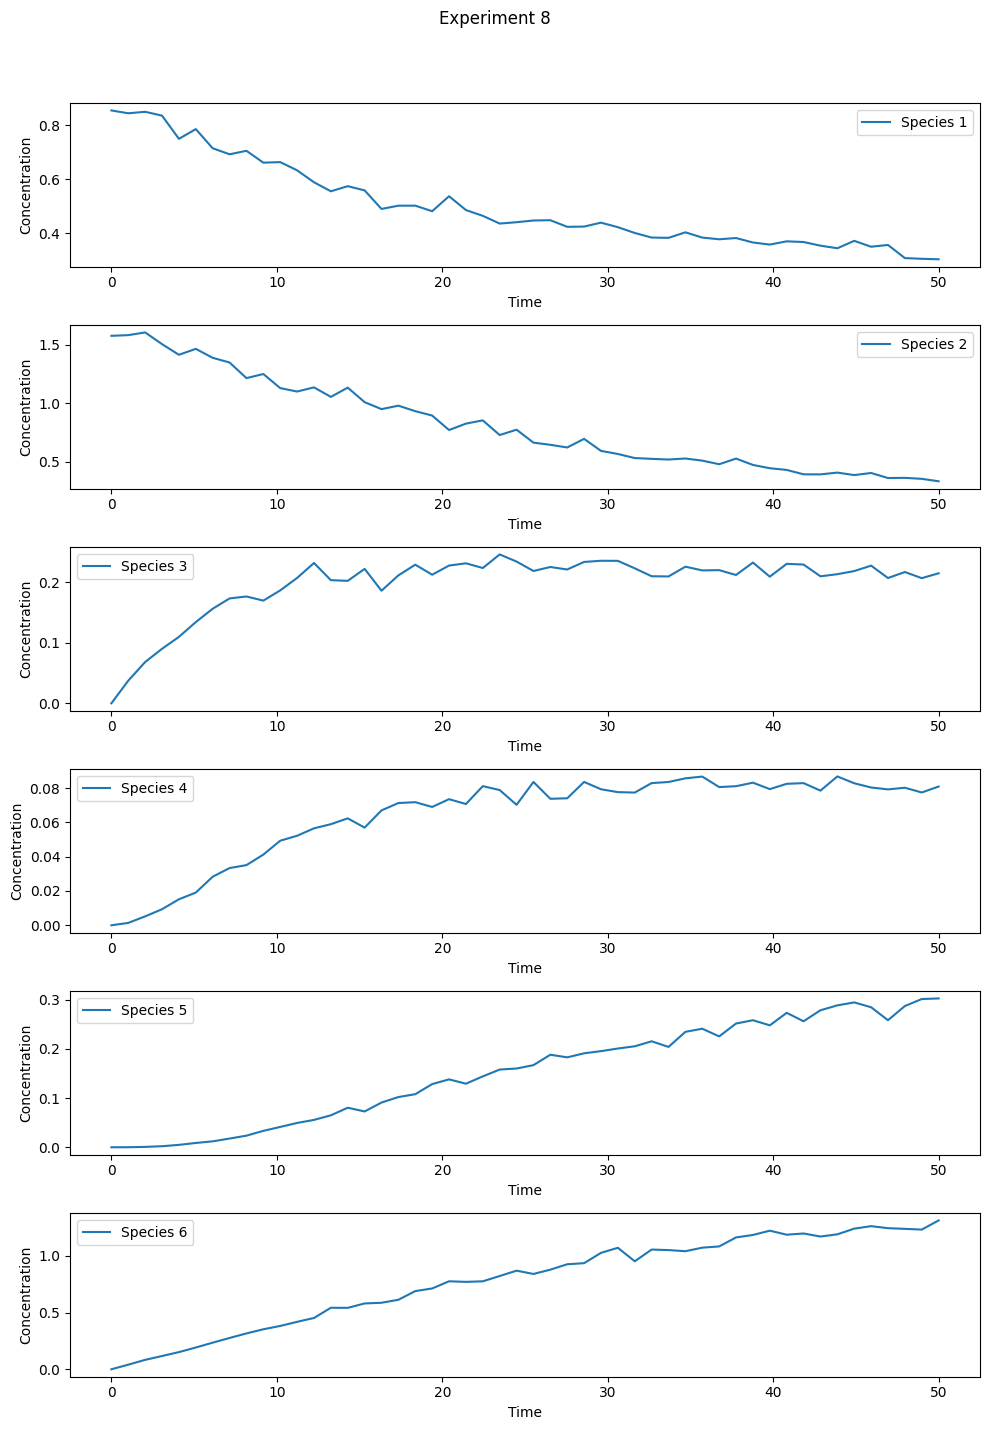

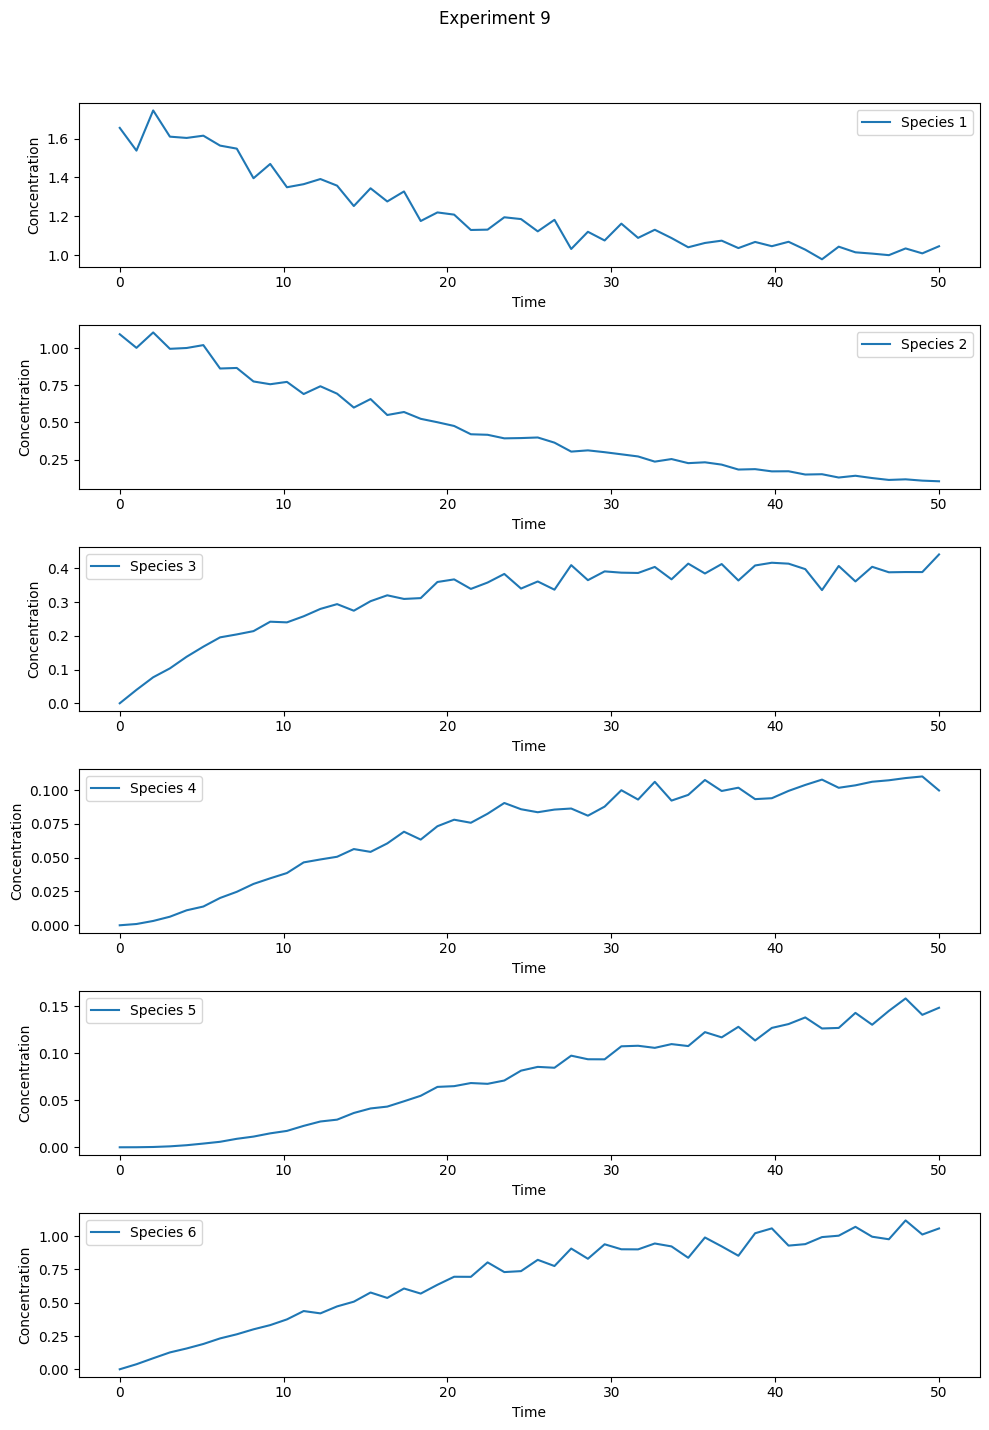

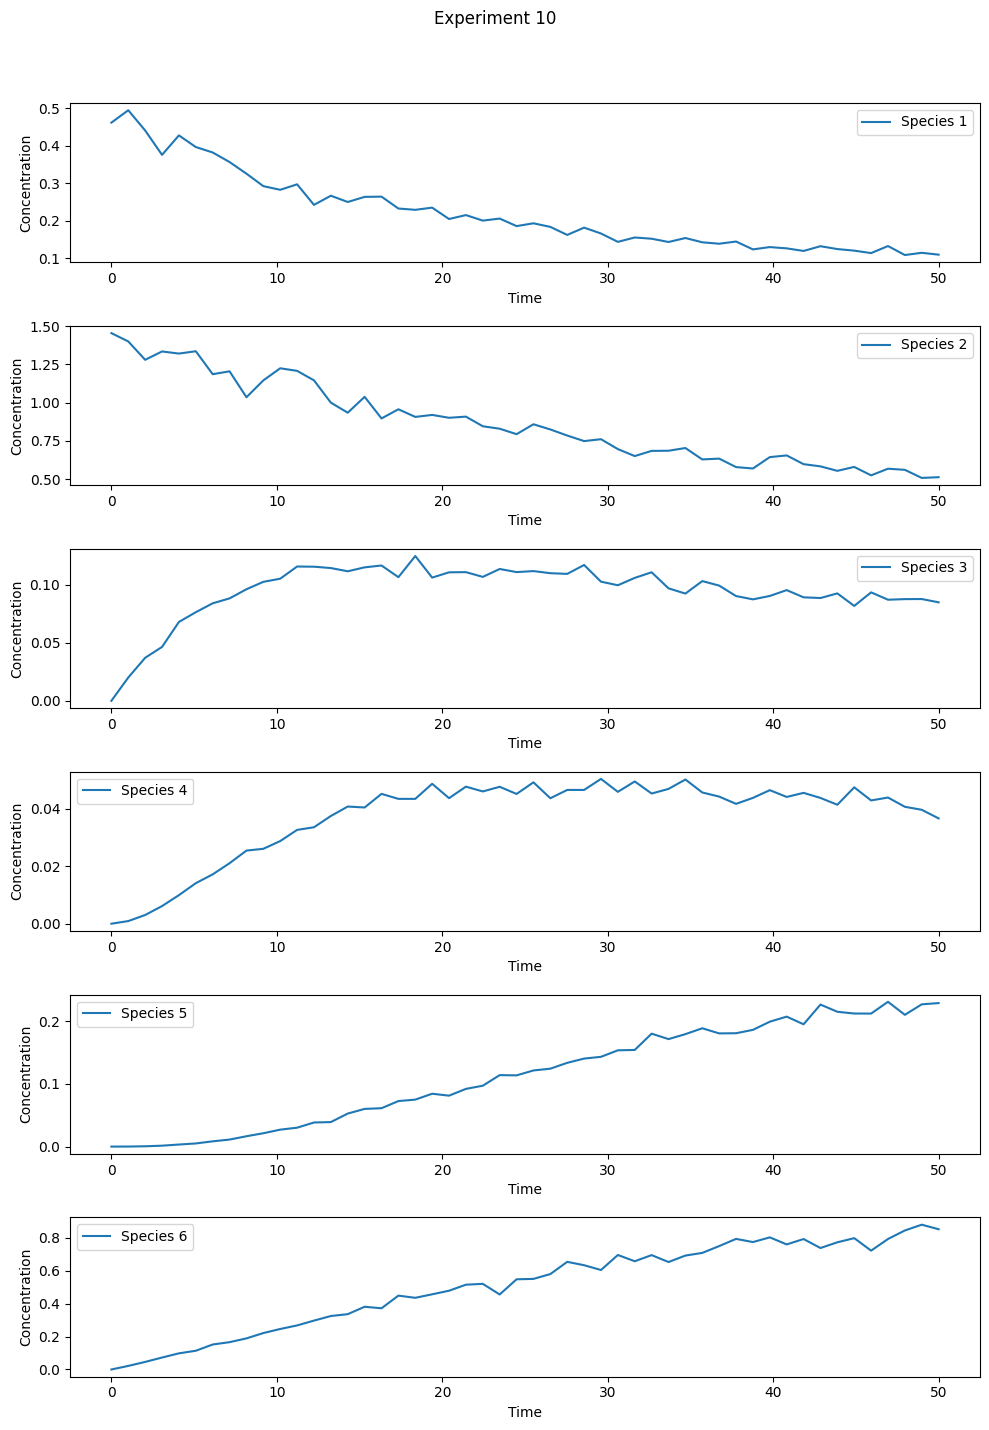

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

n_exp = 10
datasize = 50
tstep = 1
noise = 0.05
ns = 6
tspan = [0.0, datasize * tstep]
tsteps = np.linspace(tspan[0], tspan[1], datasize)

logA = np.array([18.60, 19.13, 7.93])
Ea = np.array([14.54, 14.42, 6.47])

def Arrhenius(logA, Ea, T):
    R = 1.98720425864083e-3
    k = np.exp(logA) * np.exp(-Ea / R / T)
    return k

def trueODEfunc(y, t, k):
    dydt = np.zeros(len(y))
    r1 = k[0] * y[0] * y[1]
    r2 = k[1] * y[2] * y[1]
    r3 = k[2] * y[3] * y[1]
    dydt[0] = -r1
    dydt[1] = -r1 - r2 - r3
    dydt[2] = r1 - r2
    dydt[3] = r2 - r3
    dydt[4] = r3
    dydt[5] = r1 + r2 + r3
    return dydt

u0_list = np.random.rand(n_exp, ns + 1).astype(np.float32)
u0_list[:, 0:2] = u0_list[:, 0:2] * 2.0 + 0.2
u0_list[:, 2:ns] = 0.0
u0_list[:, ns] = u0_list[:, ns] * 20.0 + 323.0

ode_data_list = np.zeros((n_exp, ns, datasize), dtype=np.float32)

for i in range(n_exp):
    u0 = u0_list[i, :]
    k = Arrhenius(logA, Ea, u0[-1])
    ode_data = odeint(trueODEfunc, u0[:-1], tsteps, args=(k,))
    ode_data += np.random.randn(*ode_data.shape) * ode_data * noise
    ode_data_list[i, :, :] = ode_data.T

for i in range(n_exp):
    fig, axs = plt.subplots(ns, 1, figsize=(10, 15))
    for j in range(ns):
        axs[j].plot(tsteps, ode_data_list[i, j, :], label=f"Species {j+1}")
        axs[j].set_xlabel("Time")
        axs[j].set_ylabel("Concentration")
        axs[j].legend()
    plt.suptitle(f"Experiment {i+1}")
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()